# TP1 Apprentissage

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

## Exercice 1 : Manipulation de la base de données

### Load MNIST dataset

In [0]:
# import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

In [0]:
print(mnist.DESCR)

In [7]:
print("Shape of data : ", mnist.data.shape)
print("Shape of target : ",mnist.target.shape)

Shape of data :  (70000, 784)
Shape of target :  (70000,)


In [9]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Visualize dataset

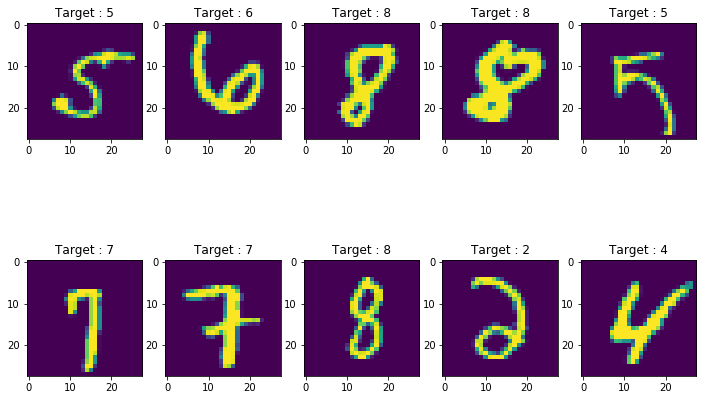

In [23]:
plt.figure(figsize=(12,8))
for i in range(10):
    idx = np.random.randint(len(mnist.data))
    plt.subplot(2,5,i+1)
    plt.imshow(mnist.data[idx].reshape(28,28))
    plt.title("Target : {}".format(mnist.target[idx]))
plt.show()

## Exercice 2 : La méthode des KNNs

### Prendre un échantillon de données


In [11]:
import random
indexes = random.sample(range(70000),5000)
images = mnist.data[indexes].reshape((-1,28,28))
data = mnist.data[indexes]
labels = mnist.target[indexes]
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of label : ", labels.shape)

Shape of training images :  (5000, 28, 28)
Shape of training data :  (5000, 784)
Shape of label :  (5000,)


### Splitter data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Training data shape : ", X_train.shape)
print("Training target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Traning data shape :  (4000, 784)
Traning target shape :  (4000,)
Testing data shape :  (1000, 784)
Testing target shape :  (1000,)


### Entrainer un classfieur KNN avec k = 10

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNNs
n_neighbors = 10
clf = KNNs(n_neighbors)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Afficher les prédictions

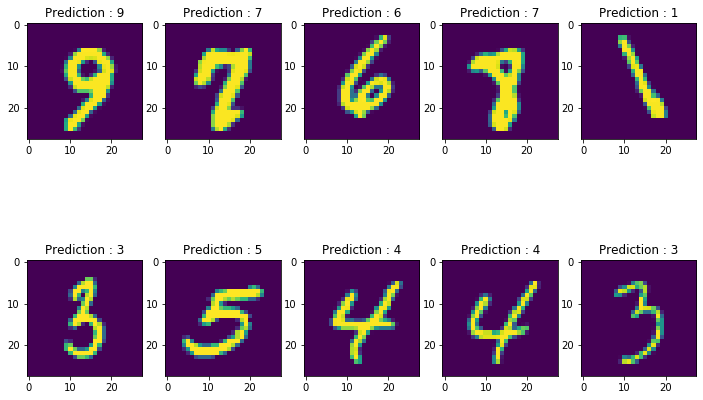

In [22]:
plt.figure(figsize=(12,8))
# y_pred = clf.predict(X_test[:10,:])
for i in range(10):
    idx = np.random.randint(len(X_test))
    y_pred = clf.predict([X_test[idx]])
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(28,28))
    plt.title("Prediction : {}".format(y_pred[0]))
plt.show()

### Afficher le score 


In [0]:
def get_score(y_true,y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    print("Nb of true prediction : {}/{}".format(correct,len(y_true)))
    return correct / len(y_true)

In [27]:
y_pred = clf.predict(X_test)
score  = get_score(y_test,y_pred)
print("Score = ",score)

Nb of true prediction : 920/1000
Score =  0.92


### Afficher le rapport de la classification

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        91
           1       0.88      1.00      0.94       112
           2       1.00      0.97      0.98        96
           3       0.89      0.94      0.91       102
           4       0.92      0.96      0.94        99
           5       0.85      0.86      0.85        92
           6       0.94      0.94      0.94        94
           7       0.92      0.94      0.93        98
           8       0.97      0.73      0.84        97
           9       0.92      0.89      0.91       119

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



### Matrice de confusion

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


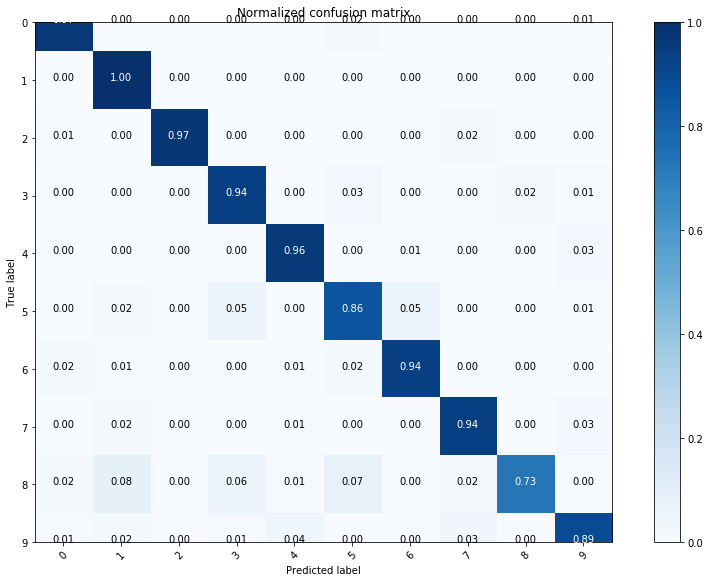

In [36]:
# target_list = ["0","1","2","3","4","5","6","7","8","9"]
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Explorer des parametres

#### 1.Varier le nb de voisins

In [38]:
scores = []
for n_neighbors in range(2,16):
    print("==== Case n_neighbors : {} =====".format(n_neighbors))
    clf = KNNs(n_neighbors)
    print("Fitting model...")
    clf.fit(X_train,y_train)
    print("Predicting...")
    y_pred = clf.predict(X_test)
    score = get_score(y_test,y_pred)
    scores.append(score)

==== Case n_neighbors : 2 =====
Fitting model...
Predicting...
Nb of true prediction : 917/1000
==== Case n_neighbors : 3 =====
Fitting model...
Predicting...
Nb of true prediction : 922/1000
==== Case n_neighbors : 4 =====
Fitting model...
Predicting...
Nb of true prediction : 920/1000
==== Case n_neighbors : 5 =====
Fitting model...
Predicting...
Nb of true prediction : 923/1000
==== Case n_neighbors : 6 =====
Fitting model...
Predicting...
Nb of true prediction : 927/1000
==== Case n_neighbors : 7 =====
Fitting model...
Predicting...
Nb of true prediction : 922/1000
==== Case n_neighbors : 8 =====
Fitting model...
Predicting...
Nb of true prediction : 923/1000
==== Case n_neighbors : 9 =====
Fitting model...
Predicting...
Nb of true prediction : 925/1000
==== Case n_neighbors : 10 =====
Fitting model...
Predicting...
Nb of true prediction : 920/1000
==== Case n_neighbors : 11 =====
Fitting model...
Predicting...
Nb of true prediction : 923/1000
==== Case n_neighbors : 12 =====
Fitti

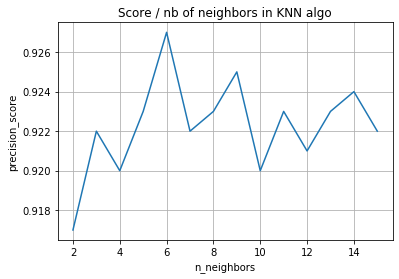

In [44]:
fig, ax = plt.subplots()
n_neighbors = np.arange(2,16,1)
ax.plot(n_neighbors, np.array(scores))

ax.set(xlabel='n_neighbors', ylabel='precision_score',
       title='Score / nb of neighbors in KNN algo')
ax.grid()
# fig.savefig("score-per-neighbors.png")
plt.show()

#### 2.K-Fold


In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=True)


In [0]:
# id_fold = 1
# for train_index, test_index in kf.split(data):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     print("==========Fold num {}============".format(id_fold))
#     id_fold += 1
#     X_train, X_test = data[train_index], data[test_index]
#     y_train, y_test = labels[train_index], labels[test_index]
#     clf = KNNs(n_neighbors)
#     print("Fitting model...")
#     clf.fit(X_train,y_train)
#     print("Predicting...")
#     y_pred = clf.predict(X_test)
#     correct = 0
#     for i in range(len(y_test)):
#         if y_test[i] == y_pred[i]:
#             correct += 1
#     print("Nb of true prediction : {}/{}".format(correct,len(y_test)))    

In [53]:
id_fold = 0
scores = np.zeros((10,14))
for train_index, test_index in kf.split(data):
#     print("TRAIN:", train_index, "TEST:", test_index)
    print("==========Fold num {}============".format(id_fold))
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    for n_neighbors in range(2,16):
        print("      ==== Case n_neighbors : {} =====".format(n_neighbors))
        clf = KNNs(n_neighbors)
        print("      Fitting model...")
        clf.fit(X_train,y_train)
        print("      Predicting...")
        y_pred = clf.predict(X_test)
        score = get_score(y_test,y_pred)
        scores[id_fold,n_neighbors-2] = score
        
    id_fold += 1
    print("================= Fin ======================\n")

==========Fold num 0============
      ==== Case n_neighbors : 2 =====
      Fitting model...
      Predicting...
Nb of true prediction : 463/500
      ==== Case n_neighbors : 3 =====
      Fitting model...
      Predicting...
Nb of true prediction : 468/500
      ==== Case n_neighbors : 4 =====
      Fitting model...
      Predicting...
Nb of true prediction : 468/500
      ==== Case n_neighbors : 5 =====
      Fitting model...
      Predicting...
Nb of true prediction : 461/500
      ==== Case n_neighbors : 6 =====
      Fitting model...
      Predicting...
Nb of true prediction : 466/500
      ==== Case n_neighbors : 7 =====
      Fitting model...
      Predicting...
Nb of true prediction : 462/500
      ==== Case n_neighbors : 8 =====
      Fitting model...
      Predicting...
Nb of true prediction : 461/500
      ==== Case n_neighbors : 9 =====
      Fitting model...
      Predicting...
Nb of true prediction : 460/500
      ==== Case n_neighbors : 10 =====
      Fitting model...
 

In [56]:
scores.shape

(10, 14)

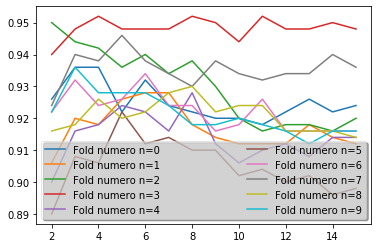

In [61]:
fig, ax = plt.subplots()
n_neighbors = np.arange(2,16,1)
for n in range(10):
    plt.plot(n_neighbors, scores[n,:], label="Fold numero n=%d"%(n,))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

#### 3.Pourcentage des échantillons

In [64]:
def get_rate(x):
    return 0.5 + int(x) * 0.05
for i in range(10):
    print(get_rate(i))

0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.8500000000000001
0.9
0.95


In [65]:
scores = []
for i in range(10):
    split_rate =  get_rate(i)
    print("===== Case split_rate = {}  =======".format(split_rate))
    X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =split_rate)
    print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
    print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
    n_neighbors = 10
    clf = KNNs(n_neighbors)
    print("Fitting model...")
    clf.fit(X_train,y_train)
    print("Predicting...")
    y_pred = clf.predict(X_test)
    score = get_score(y_test,y_pred)
    scores.append(score)
    print("=====================================\n")

===== Case split_rate = 0.5  =======
Traning data shape :  (2500, 784) Traning target shape :  (2500,)
Testing data shape :  (2500, 784) Testing target shape :  (2500,)
Fitting model...
Predicting...
Nb of true prediction : 2281/2500

===== Case split_rate = 0.55  =======
Traning data shape :  (2750, 784) Traning target shape :  (2750,)
Testing data shape :  (2250, 784) Testing target shape :  (2250,)
Fitting model...
Predicting...
Nb of true prediction : 2060/2250

===== Case split_rate = 0.6  =======
Traning data shape :  (3000, 784) Traning target shape :  (3000,)
Testing data shape :  (2000, 784) Testing target shape :  (2000,)
Fitting model...
Predicting...
Nb of true prediction : 1805/2000

===== Case split_rate = 0.65  =======
Traning data shape :  (3250, 784) Traning target shape :  (3250,)
Testing data shape :  (1750, 784) Testing target shape :  (1750,)
Fitting model...
Predicting...
Nb of true prediction : 1607/1750

===== Case split_rate = 0.7  =======
Traning data shape : 

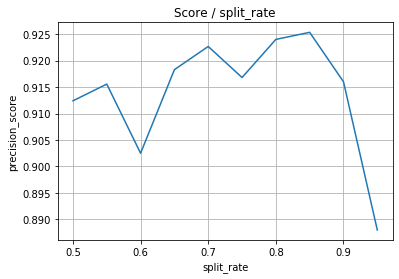

In [67]:
fig, ax = plt.subplots()
split_rate = [get_rate(i) for i in range(10)] 
ax.plot(np.array(split_rate), np.array(scores))

ax.set(xlabel='split_rate', ylabel='precision_score',
       title='Score / split_rate')
ax.grid()
# fig.savefig("score-per-neighbors.png")
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
scores = []
for p in range(1,10):
    clf = KNNs(n_neighbors=10,p=p,metric='minkowski')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = get_score(y_test,y_pred)
    scores.append(score)

Nb of true prediction : 887/1000
Nb of true prediction : 912/1000
Nb of true prediction : 922/1000
Nb of true prediction : 924/1000
Nb of true prediction : 926/1000
Nb of true prediction : 929/1000
Nb of true prediction : 929/1000
Nb of true prediction : 931/1000
Nb of true prediction : 931/1000


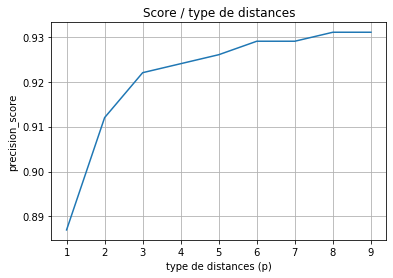

In [70]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10,1), np.array(scores))

ax.set(xlabel='type de distances (p)', ylabel='precision_score',
       title='Score / type de distances')
ax.grid()
# fig.savefig("score-per-neighbors.png")
plt.show()

#### 4.Tester n_jobs in KNN algo

In [73]:
## Case n_jobs = 1
import time
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
n_neighbors = 10
clf = KNNs(n_neighbors,n_jobs = 1)
start = time.time()
print("Fitting model...")
clf.fit(X_train,y_train)
end_train = time.time()
print("Training time : ",end_train-start)
print("Predicting...")
y_pred = clf.predict(X_test)
end_pred = time.time()
print("Predicting time: ",end_pred-end_train)
score = get_score(y_test,y_pred)
print("Score : ",score)
print("Total execution time : ",time.time()-start)

Traning data shape :  (4000, 784) Traning target shape :  (4000,)
Testing data shape :  (1000, 784) Testing target shape :  (1000,)
Fitting model...
Training time :  0.11102581024169922
Predicting...
Predicting time:  6.197011947631836
Nb of true prediction : 925/1000
Score :  0.925
Total execution time :  6.309671401977539


In [74]:
## Case n_jobs = -1
import time
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
n_neighbors = 10
clf = KNNs(n_neighbors,n_jobs = -1)
start = time.time()
print("Fitting model...")
clf.fit(X_train,y_train)
end_train = time.time()
print("Training time : ",end_train-start)
print("Predicting...")
y_pred = clf.predict(X_test)
end_pred = time.time()
print("Predicting time: ",end_pred-end_train)
score = get_score(y_test,y_pred)
print("Score : ",score)
print("Total execution time : ",time.time()-start)

Traning data shape :  (4000, 784) Traning target shape :  (4000,)
Testing data shape :  (1000, 784) Testing target shape :  (1000,)
Fitting model...
Training time :  0.11366963386535645
Predicting...
Predicting time:  4.9464216232299805
Nb of true prediction : 920/1000
Score :  0.92
Total execution time :  5.06197714805603


-----

